In [13]:
from astropy.io import fits
from matplotlib import pyplot as plt
% matplotlib inline
from astropy.stats import sigma_clip
from astropy.stats import biweight_midvariance as bimv
from astropy.stats import biweight_location as bil
import numpy as np
import numpy.ma as ma
import scipy as sp
from scipy import signal
import operator
import sys

In [3]:
def poi(file,field_sigma=3,iterations=5,column_sigma=5):
    im = fits.getdata(file)
    scim = sigma_clip(im, sigma=field_sigma, iters=iterations)
    
    for i in range(1052):
        mean=ma.mean(scim[:,i])
        sig=np.sqrt(bimv(scim[:,i]))
        out=ma.where(scim[:,i]>(mean+column_sigma*sig))[0]
        if out.size:
            for j in range(len(out)):
                print((i+1,out[j]+1))

In [4]:
poi("Fepdsses20180219T070215.4_074_sci_L.fits")

(4, 19)
(6, 19)
(8, 57)
(39, 9)
(40, 9)
(49, 199)
(50, 199)
(79, 120)
(80, 120)
(87, 66)
(88, 66)
(91, 214)
(93, 52)
(94, 52)
(102, 114)
(102, 120)
(103, 120)
(107, 170)
(108, 170)
(125, 106)
(132, 112)
(134, 112)
(145, 29)
(146, 75)
(165, 61)
(167, 103)
(179, 27)
(193, 204)
(194, 204)
(197, 192)
(198, 192)
(223, 107)
(224, 165)
(225, 163)
(225, 165)
(226, 163)
(229, 162)
(238, 65)
(239, 65)
(242, 6)
(243, 6)
(258, 21)
(261, 66)
(267, 69)
(285, 15)
(329, 147)
(331, 147)
(360, 46)
(362, 46)
(374, 93)
(376, 32)
(377, 32)
(403, 13)
(404, 13)
(407, 115)
(412, 176)
(446, 131)
(447, 131)
(450, 135)
(451, 74)
(493, 151)
(514, 65)
(517, 138)
(518, 138)
(519, 184)
(521, 157)
(522, 157)


/home/rfoster/.local/lib/python3.5/site-packages/astropy/stats/biweight.py:362: RuntimeWarning: invalid value encountered in double_scalars
  return n * f1 / f2
/home/rfoster/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


(555, 1)
(583, 51)
(589, 195)
(598, 102)
(598, 180)
(599, 102)
(600, 165)
(608, 74)
(614, 73)
(615, 73)
(615, 205)
(616, 73)
(617, 205)
(618, 205)
(620, 205)
(621, 59)
(621, 175)
(622, 205)
(624, 202)
(628, 64)
(629, 31)
(629, 64)
(630, 31)
(631, 31)
(632, 31)
(633, 31)
(635, 155)
(641, 31)
(672, 87)
(677, 144)
(678, 144)
(685, 179)
(687, 179)
(693, 95)
(702, 166)
(703, 166)
(721, 136)
(727, 125)
(729, 125)
(729, 177)
(740, 64)
(741, 41)
(743, 179)
(746, 45)
(762, 15)
(768, 153)
(771, 12)
(789, 101)
(790, 101)
(816, 105)
(817, 105)
(818, 105)
(818, 184)
(819, 153)
(819, 183)
(820, 153)
(847, 9)
(849, 21)
(850, 148)
(854, 129)
(855, 129)
(856, 129)
(856, 190)
(856, 193)
(857, 197)
(862, 68)
(864, 128)
(875, 151)
(901, 54)
(902, 54)
(932, 208)
(933, 208)
(939, 104)
(940, 104)
(967, 61)
(969, 61)
(973, 148)
(983, 96)
(984, 129)
(985, 199)
(1000, 82)
(1001, 82)
(1004, 15)
(1005, 15)
(1008, 120)
(1009, 120)
(1019, 161)
(1027, 171)
(1027, 221)
(1028, 221)
(1048, 59)


In [5]:
im = fits.getdata("Fepdsses20180219T070215.4_074_sci_L.fits")
sig = sigma_clip(im)
mean = ma.mean(sig,axis=1)

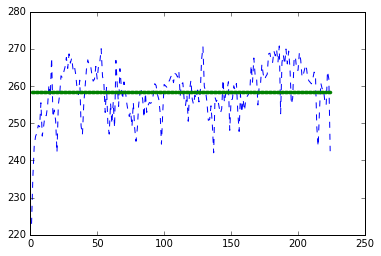

In [12]:
y = list(range(1,225))
pfit = np.poly1d(np.polyfit(y,mean,0))
plt.plot(y,mean,'--',y,pfit(y),'.')
plt.show()

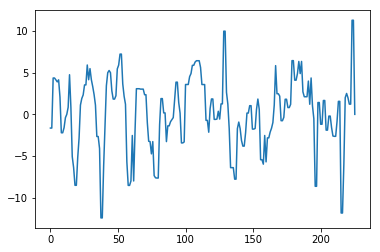

In [31]:
realfinal=out-final(y)
plt.plot(y,sp.signal.medfilt(realfinal))
plt.show()

# No Correction

In [3]:
def no_corr(file,field_sigma=3,iterations=5,column_sigma=2,vary=15):
    im = fits.getdata(file)
    sc = sigma_clip(im, sigma=field_sigma, iters=iterations)
    rows = ma.mean(sc,axis=1)

    for i in range(len(rows)):
        neighboorhood=np.take(rows,range(i-vary,i+vary+1),mode='wrap')
        index, value = max(enumerate(neighboorhood), key=operator.itemgetter(1))
        if i==(index+i-vary):
            if (index+i-vary)>=0:
                if index <= len(rows):
                    print(index+i-vary+1)

In [289]:
no_corr("Fepdsses20180219T070215.4_074_sci_L.fits")

29
53
111
129
186
222


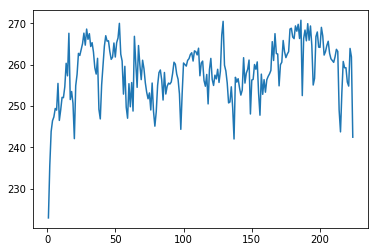

In [274]:
im = fits.getdata("Fepdsses20180219T070215.4_074_sci_L.fits")
sc = sigma_clip(im)
rows = ma.mean(sc,axis=1)
y = list(range(1,225))
flattened = rows
plt.plot(y,flattened)
plt.show()

# Poly Only

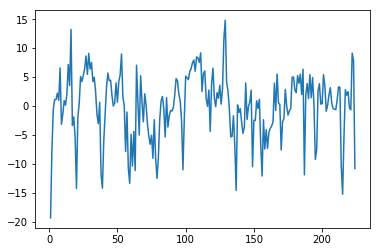

In [353]:
im = fits.getdata("Fepdsses20180219T070215.4_074_sci_L.fits")
sc = sigma_clip(im)
rows = ma.mean(sc,axis=1)
y = list(range(1,225))
pfit = np.poly1d(np.polyfit(y,rows,4))
flattened = rows - pfit(y)
plt.plot(y,flattened)
plt.show()

In [4]:
def poly(file, kappa=3, iterations=5, sigma=2, poly=4):
    im = fits.getdata(file)
    sc = sigma_clip(im, sigma=kappa, iters=iterations)
    rows = ma.mean(sc,axis=1)
    y = list(range(224))
    pfit = np.poly1d(np.polyfit(y,rows,poly))
    flattened = rows - pfit(y)

    for i in range(224):
        mean = ma.mean(flattened)
        sig = ma.std(flattened)
        out = ma.where(flattened[i]>(mean+sigma*sig))[0]
        if out.size:
            print(i+1)

In [379]:
poly("Fepdsses20180219T070215.4_074_sci_L.fits", poly=14)

16
53
64
128
129


# Med Only

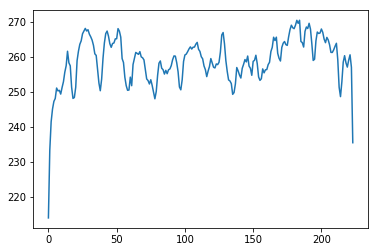

In [290]:
im = fits.getdata("Fepdsses20180219T070215.4_074_sci_L.fits")
sc = sigma_clip(im)
medfilt = sp.signal.medfilt(sc)
rows = ma.mean(medfilt,axis=1)
plt.plot(list(range(len(rows))),rows)
plt.show()

In [5]:
def med(file,field_sigma=3,iterations=5,column_sigma=2,vary=15):
    im = fits.getdata(file)
    sc = sigma_clip(im, sigma=field_sigma, iters=iterations)
    medfilt = sp.signal.medfilt(sc)
    rows = ma.mean(medfilt,axis=1)

    for i in range(len(rows)):
        neighboorhood=np.take(rows,range(i-vary,i+vary+1),mode='wrap')
        index, value = max(enumerate(neighboorhood), key=operator.itemgetter(1))
        if i==(index+i-vary):
            if (index+i-vary)>=0:
                if index <= len(rows):
                    print(index+i-vary+1)

In [292]:
med("Fepdsses20180219T070215.4_074_sci_L.fits")

28
52
110
129
185


# Poly-Med

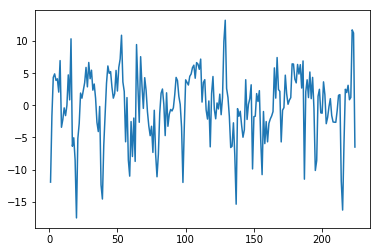

In [300]:
im = fits.getdata("Fepdsses20180219T070215.4_074_sci_L.fits")
sc = sigma_clip(im)
rows = ma.mean(sc,axis=1)
y = list(range(1,225))
pfit = np.poly1d(np.polyfit(y,rows,6))
polymed = sp.signal.medfilt(pfit(y))
flattened = rows - polymed
plt.plot(y,flattened)
plt.show()

In [16]:
def polymed(file,field_sigma=3,iterations=5,column_sigma=2, poly=4):
    im = fits.getdata(file)
    sc = sigma_clip(im, sigma=field_sigma, iters=iterations)
    rows = ma.mean(sc,axis=1)
    y = list(range(1,225))
    pfit = np.poly1d(np.polyfit(y,rows,poly))
    polymed = sp.signal.medfilt(pfit(y))
    flattened = rows - polymed

    for i in range(224):
        mean = ma.mean(flattened)
        sig = ma.std(flattened)
        out = ma.where(flattened[i]>(mean+column_sigma*sig))[0]
        if out.size:
            print(i+1)

In [370]:
polymed("Fepdsses20180219T070215.4_074_sci_L.fits", poly=6)

53
129
222
223


# Med-Poly

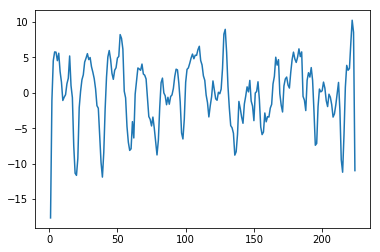

In [306]:
im = fits.getdata("Fepdsses20180219T070215.4_074_sci_L.fits")
sc = sigma_clip(im)
medfilt=sp.signal.medfilt(sc)
rows = ma.mean(medfilt,axis=1)
y = list(range(1,225))
medpoly = np.poly1d(np.polyfit(y,rows,6))
flattened = rows - medpoly(y)
plt.plot(y,flattened)
plt.show()

In [7]:
def medpoly(file,field_sigma=3,iterations=5,column_sigma=2):
    im = fits.getdata(file)
    sc = sigma_clip(im, sigma=field_sigma, iters=iterations)
    medfilt=sp.signal.medfilt(sc)
    rows = ma.mean(medfilt,axis=1)
    y = list(range(1,225))
    medpoly = np.poly1d(np.polyfit(y,rows,6))
    flattened = rows - medpoly(y)

    for i in range(224):
        mean = ma.mean(flattened)
        sig = ma.std(flattened)
        out = ma.where(flattened[i]>(mean+column_sigma*sig))[0]
        if out.size:
            print(i+1)

In [311]:
medpoly("Fepdsses20180219T070215.4_074_sci_L.fits",column_sigma=2)

222


In [24]:
file='Fepdsses20180219T070215.4_103_sci_L.fits'
print('No Correction:')
no_corr(file)
print('')
print('Poly:')
poly(file)
print('')
print('Median:')
med(file)
print('')
print('Poly-Median:')
polymed(file)
print('')
print('Median-Poly:')
medpoly(file)

No Correction:
69
85
116
162
192
211

Poly:
116
211

Median:
86
117
140

Poly-Median:
116
211

Median-Poly:
115
116
117
210
211
